# 4.7.4 Gradient Boosting 모델

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('2017DC1.csv')   # 머신러닝 최종데이터 2017DC1.csv 불러오기
df.shape

(20495, 30)

In [2]:
data = df.drop(['VALP_B1'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장
target = df['VALP_B1']                # 타겟변수만 target에 저장

# 50:50 데이터 분할
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

In [3]:
# Gradient Boosting 모델 (Default 모델)
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score
gr = GradientBoostingClassifier(random_state = 0) 
model = gr.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("grbt Accuracy on training set:{:.5f}".format(model.score(X_train, y_train))) 
print ("grbt Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

grbt Accuracy on training set:0.77330
grbt Accuracy on test set:0.74171


In [ ]:
# 이하의 모든 그리드 서치 실행문은 StratifiedKFold의 shuffle 옵션, 혹은
# Gradient Boosting 모델의 내부 로직으로 인해 결과가 다르게 나올 수 있음에 유의

In [4]:
# Gradient Boosting 모델 (Default 모델)
gr = GradientBoostingClassifier(random_state = 0) 

In [5]:
# 그리드 서치 실행
# 아래 코딩 실행에 85초 소요
import time
start = time.time()

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# Gradient Boosting 모델 (Default 모델)
gr = GradientBoostingClassifier(random_state = 0) 

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
params = {'max_depth': range(5, 51, 5)}

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_gr = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=cross_validation,\
                       n_jobs=-1)
grid_gr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_gr.best_score_))
print("GridSearchCV best parameter:", (grid_gr.best_params_)) 

end = time.time()
print(f"Runtime of the program is {end - start}")

GridSearchCV max accuracy:0.82863
GridSearchCV best parameter: {'max_depth': 10}
Runtime of the program is 85.19201278686523


In [17]:
# 그리드 서치 추가 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# Gradient Boosting 모델 (Default 모델)
gr = GradientBoostingClassifier(random_state = 0) 

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
params = {'max_depth': range(5, 16), 'n_estimators':[200]}

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_gr = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=cross_validation,\
                       n_jobs=-1)
grid_gr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_gr.best_score_))
print("GridSearchCV best parameter:", (grid_gr.best_params_)) 

GridSearchCV max accuracy:0.83829
GridSearchCV best parameter: {'max_depth': 13, 'n_estimators': 200}


In [5]:
# 그리드 서치 추가 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# Gradient Boosting 모델 (Default 모델)
gr = GradientBoostingClassifier(random_state = 0) 

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
params = {'max_depth': range(11, 16), 'n_estimators':[100,200],
          'learning_rate':[0.01, 0.1, 1]}

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_gr = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=cross_validation,
                       n_jobs=-1)
grid_gr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_gr.best_score_))
print("GridSearchCV best parameter:", (grid_gr.best_params_)) 

GridSearchCV max accuracy:0.83839
GridSearchCV best parameter: {'learning_rate': 0.1, 'max_depth': 13, 'n_estimators': 200}


In [9]:
# 참조 코딩
clf_gr.get_params().keys()

dict_keys(['criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
# 그리드 서치 실행문은 StratifiedKFold의 shuffle 옵션, 혹은
# Gradient Boosting 모델의 내부 로직으로 인해 결과가 다르게 나올 수 있기에
# 실행시마다 아래 코딩 결과(Accuracy 및 ROC AUC값)이 다르게 나올 수 있음

In [6]:
best_clf = grid_gr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.87344
ROC AUC on test set:0.94342


In [17]:
# 데이터프레임의 행과 열 전체를 보이게 하는 조치를 (필요시) 추가
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

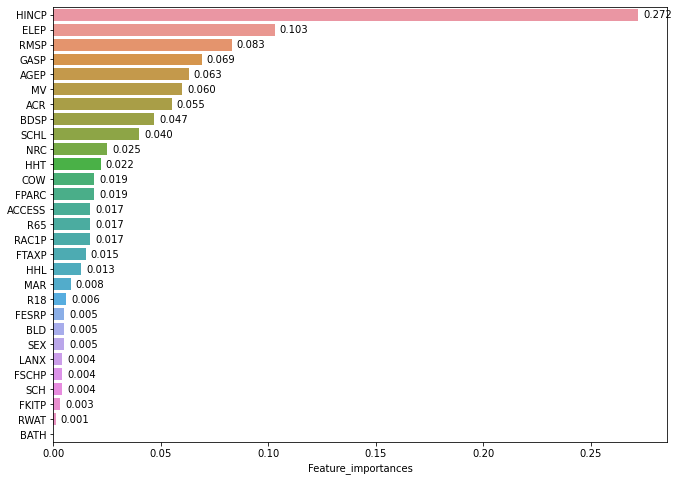

In [20]:
# 변수명을 Index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기 

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 3), index=feature_names,
                   columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)   

# 데이터프레임 dft1의 막대그래프(plot.barh) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(11, 8))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.3),
                xytext=(5, 10), textcoords='offset points')

# 이하 코딩 -> 4.8 그래서 주택 가격은 얼마일까? 

In [7]:
# Gradient Boosting 최적 모델

import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score
gr = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 13,
                                    n_estimators = 200, random_state = 0) 
model = gr.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

In [11]:
type(y_test)

pandas.core.series.Series

In [10]:
type(pred)

numpy.ndarray

In [12]:
y_test

12981    1.0
16392    1.0
19633    1.0
15201    1.0
2235     0.0
        ... 
2576     0.0
2373     0.0
16447    1.0
6633     0.0
16828    1.0
Name: VALP_B1, Length: 10248, dtype: float64

In [13]:
pred

array([1., 1., 1., ..., 1., 0., 1.])

In [14]:
y_test_arr = y_test.to_numpy()
y_test_arr

array([1., 1., 1., ..., 1., 0., 1.])

In [25]:
df_comparison = pd.DataFrame({'y_test': y_test_arr, 'pred': pred})
df_comparison.head(20)

,y_test,pred
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
5,0.0,0.0
6,1.0,1.0
7,1.0,1.0
8,1.0,1.0
9,0.0,0.0


In [18]:
# reset_index( ) 조치 전
# 기존 인덱스는 순서가 shuffle 되어 있음

X_test.head(3) 

,ACCESS,ACR,AGEP,BATH,BDSP,BLD,COW,ELEP,FESRP,FKITP,...,MV,NRC,R18,R65,RAC1P,RMSP,RWAT,SCH,SCHL,SEX
12981,1.0,2.0,17,1.0,3.0,2.0,0,150.0,0,0.0,...,5.0,1.0,1.0,0.0,9,6.0,1.0,2,14,2
16392,1.0,1.0,67,1.0,3.0,2.0,0,210.0,0,0.0,...,4.0,0.0,0.0,1.0,1,6.0,1.0,1,21,2
19633,1.0,2.0,37,1.0,3.0,2.0,1,260.0,0,0.0,...,3.0,1.0,1.0,0.0,1,7.0,1.0,1,21,2


In [22]:
# 기존 인덱스를 삭제하고 새로운 인덱스로 리셋

X_test.reset_index(drop=True).head(3) 

,ACCESS,ACR,AGEP,BATH,BDSP,BLD,COW,ELEP,FESRP,FKITP,...,MV,NRC,R18,R65,RAC1P,RMSP,RWAT,SCH,SCHL,SEX
0,1.0,2.0,17,1.0,3.0,2.0,0,150.0,0,0.0,...,5.0,1.0,1.0,0.0,9,6.0,1.0,2,14,2
1,1.0,1.0,67,1.0,3.0,2.0,0,210.0,0,0.0,...,4.0,0.0,0.0,1.0,1,6.0,1.0,1,21,2
2,1.0,2.0,37,1.0,3.0,2.0,1,260.0,0,0.0,...,3.0,1.0,1.0,0.0,1,7.0,1.0,1,21,2


In [23]:
dfu = pd.concat([X_test.reset_index(drop=True), df_comparison], axis=1)
dfu.head()

,ACCESS,ACR,AGEP,BATH,BDSP,BLD,COW,ELEP,FESRP,FKITP,...,R18,R65,RAC1P,RMSP,RWAT,SCH,SCHL,SEX,y_test,pred
0,1.0,2.0,17,1.0,3.0,2.0,0,150.0,0,0.0,...,1.0,0.0,9,6.0,1.0,2,14,2,1.0,1.0
1,1.0,1.0,67,1.0,3.0,2.0,0,210.0,0,0.0,...,0.0,1.0,1,6.0,1.0,1,21,2,1.0,1.0
2,1.0,2.0,37,1.0,3.0,2.0,1,260.0,0,0.0,...,1.0,0.0,1,7.0,1.0,1,21,2,1.0,1.0
3,1.0,3.0,57,1.0,2.0,2.0,6,170.0,0,0.0,...,0.0,0.0,1,4.0,1.0,1,17,1,1.0,1.0
4,1.0,1.0,59,1.0,3.0,2.0,0,130.0,0,0.0,...,0.0,0.0,1,7.0,1.0,1,20,1,0.0,0.0
